In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from tqdm.auto import tqdm

c:\Users\komal\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# Read input data
df = pd.read_csv(r'K:\Python_Practice_ML\Amazon_fine_food_review_sentiment_Analysis\Dataset\Reviews.csv')
print(df.shape)

(568454, 10)


In [14]:
df = df.head(1000)
print(df.shape)
print(df.head())

(1000, 10)
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canne

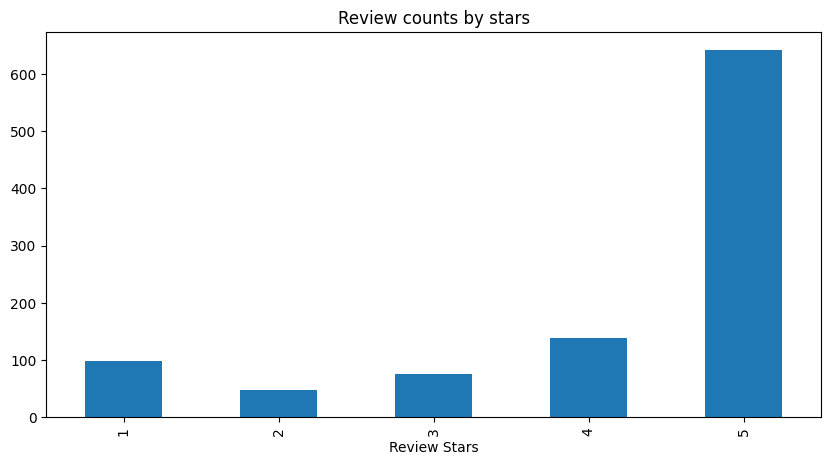

In [24]:
# EDA
ax = df['Score'].value_counts().sort_index().plot(kind = 'bar', title = 'Review counts by stars', figsize=(10,5))
ax.set_xlabel("Review Stars")
plt.show()

In [43]:
# NLTK on example reviews
ex_1_rev = df['Text'][50]
print(ex_1_rev)
ex_2_rev = df['Text'][60]
print(ex_2_rev)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.
Watch your prices with this.  While the assortment was good, and I did get this on a gold box purchase, the price for this was<br />$3-4 less at Target.


In [42]:
token_1 = nltk.word_tokenize(ex_1_rev)
token_2 = nltk.word_tokenize(ex_2_rev)
token_1[:10]


['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [44]:
token_2[:10]

['Watch',
 'your',
 'prices',
 'with',
 'this',
 '.',
 'While',
 'the',
 'assortment',
 'was']

In [50]:
# Part_of_speech_tagging
tagged_1 = nltk.pos_tag(token_1)

In [51]:
tagged_2 = nltk.pos_tag(token_2)

In [56]:
# Chunking into entities
entities = nltk.chunk.ne_chunk(tagged_1)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


VADER Sentiment Scoring

In [60]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

vader_model = SentimentIntensityAnalyzer()

In [61]:
vader_model

In [62]:
vader_model.polarity_scores('This is fine and I like it.')

{'neg': 0.0, 'neu': 0.482, 'pos': 0.518, 'compound': 0.5106}

In [63]:
vader_model.polarity_scores('I am disappointed with the performance.')

{'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.4767}

In [64]:
vader_model.polarity_scores('I happy that you tried but not satisfied that you did not make it.')

{'neg': 0.183, 'neu': 0.673, 'pos': 0.144, 'compound': -0.165}

In [65]:
vader_model.polarity_scores(ex_1_rev)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [70]:
# Performing SIA on the dataframe
result = {}
for i, row in tqdm(df.iterrows(),total=len(df)):
    text = row['Text']
    rev_id = row['Id']
    result[rev_id] = vader_model.polarity_scores(text)


100%|██████████| 1000/1000 [00:01<00:00, 792.57it/s]


In [77]:
# Converting result dict to a dataframe for analysis
res_2_df_vader = pd.DataFrame(result).T
res_2_df_vader = res_2_df_vader.reset_index().rename(columns={'index': 'Id'})
res_2_df_vader = res_2_df_vader.merge(df, how='left')
res_2_df_vader.drop(columns=['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time'])
res_2_df_vader.head(10)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,0.029,0.809,0.163,0.8830,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,0.034,0.693,0.273,0.9346,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,0.000,0.520,0.480,0.9487,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,0.000,0.851,0.149,0.6369,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,0.000,0.705,0.295,0.8313,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


<Axes: xlabel='pos', ylabel='Count'>

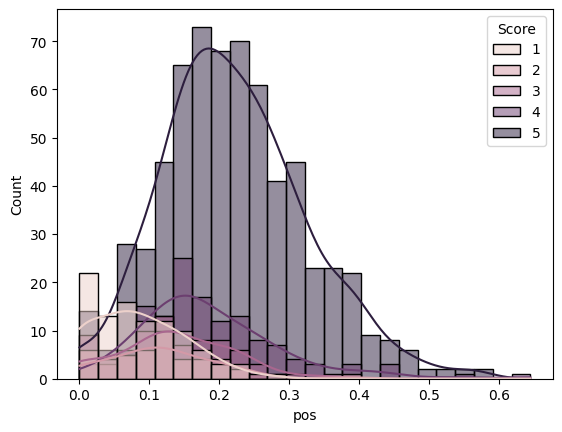

In [83]:
# Plots
sns.histplot(res_2_df_vader, x='pos', hue='Score', kde=True)

<Axes: xlabel='neu', ylabel='Count'>

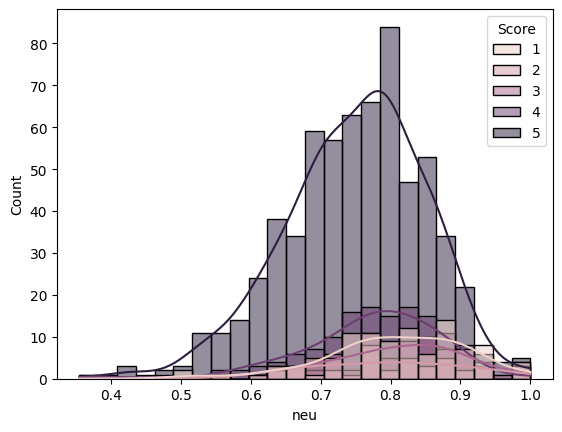

In [81]:
sns.histplot(res_2_df_vader, x='neu', hue='Score', kde=True)

<Axes: xlabel='neg', ylabel='Count'>

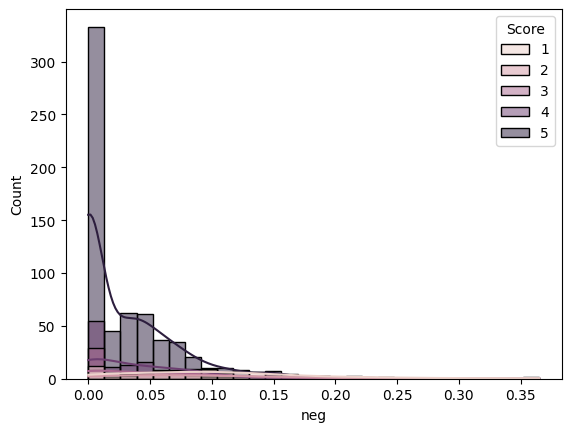

In [82]:
sns.histplot(res_2_df_vader, x='neg', hue='Score', kde=True)

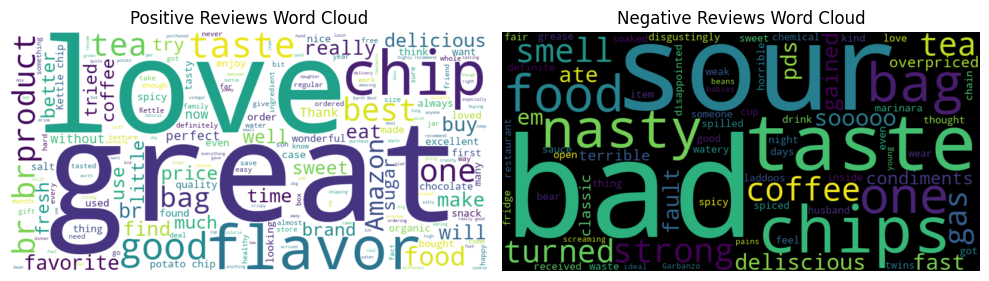

In [89]:
from wordcloud import WordCloud

positive_reviews = res_2_df_vader[res_2_df_vader['pos'] > 0.2]
negative_reviews = res_2_df_vader[res_2_df_vader['neg'] > 0.25]

positive_text = ' '.join(positive_reviews['Text'])
negative_text = ' '.join(negative_reviews['Text'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

#From the wordclouds it is vader model is performing effectively in classifying sentiments into positive and negative word clouds.